### Installing libraries required

In [ ]:
!pip install transformers sentencepiece diffusers

### Generating style cues from a prompt

In [ ]:
from transformers import pipeline

text_pipe = pipeline('text-generation', model='daspartho/prompt-extend', device=0)

prompt = "elon musk as thor"
extended_prompt = text_pipe(prompt+',', num_return_sequences=1)[0]["generated_text"]
extended_prompt

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


'elon musk as thor, realistic portrait, symmetrical, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting, art by artgerm and greg rutkowski and alphonse mucha high definition digital art, in the style of ilya'

### Trying the prompts with stable diffusion

#### Setting up stable diffusion

Be sure to login with a auth token for stable diffusion :)

In [ ]:
from huggingface_hub import notebook_login
from diffusers import StableDiffusionPipeline
from pathlib import Path
import torch

if not (Path.home()/'.huggingface'/'token').exists(): 
    notebook_login()

In [ ]:
sd_pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    torch_dtype=torch.float16,
).to("cuda")

#### Image generated using input prompt

  0%|          | 0/51 [00:00<?, ?it/s]

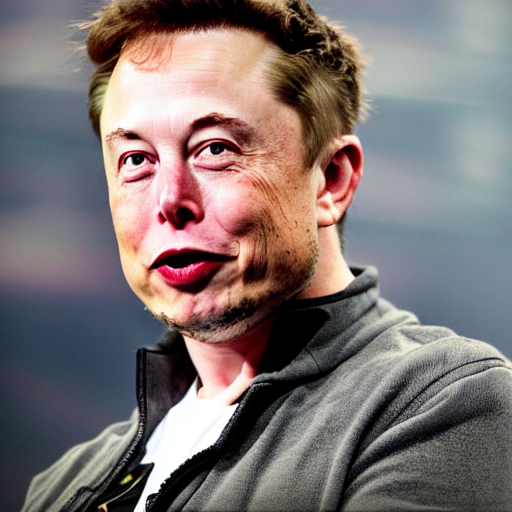

In [ ]:
torch.manual_seed(32)
sd_pipe(prompt).images[0]

#### Image generated using extended prompt

  0%|          | 0/51 [00:00<?, ?it/s]

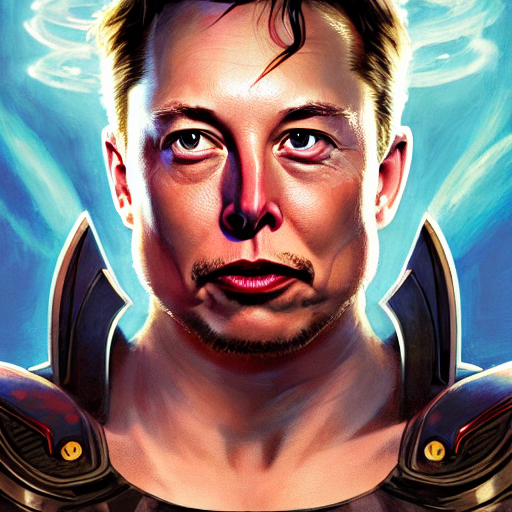

In [ ]:
torch.manual_seed(32)
sd_pipe(extended_prompt).images[0]